In [5]:
!pip install scikit-dsp-comm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 2.5 MB/s eta 0:00:00


Menginstall modul library scikit-dsp-comm

In [6]:
%pylab inline
#%pylab notebook # for plots editable inthe notebook
#%matplotlib qt # for popout plots
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


Code diatas bertujuan untuk mengimpor berbagai modul dan library yang berguna untuk pemrosesan sinyal digital yang akan dilakukan. Baris pertama %pylab inline mengatur matplotlib untuk menampilkan grafik. Kode kemudian mengimpor modul sigsys, fir_design_helper, iir_design_helper, dan multirate_helper dari library sk_dsp_comm, yang menyediakan fungsi untuk analisis dan desain filter sinyal digital (baik FIR maupun IIR) serta pemrosesan multirate. scipy.signal diimpor untuk memanfaatkan fungsi-fungsi signal processing dari SciPy. Audio dan display dari IPython.display digunakan untuk menampilkan audio dan gambar dalam notebook.

In [ ]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX


Mengatur konfigurasi gambar yang akan ditampilkan. Baris %config InlineBackend.figure_formats=['svg'] mengatur agar gambar yang dihasilkan oleh matplotlib ditampilkan dalam format SVG (Scalable Vector Graphics). %config InlineBackend.figure_formats=['pdf'] menunjukkan opsi alternatif untuk menampilkan gambar dalam format PDF.

In [ ]:
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

Code diatas bertujuan untuk merancang dua filter low-pass FIR berbeda. Fungsi firwin_kaiser_lpf memerlukan parameter cut-off frequency, dalam contoh ini 1/8, Lebar transisi 1/6, jumlah tap filter 50, dan faktor pengali amplitudo 1.0. Fungsi fir_remez_lpf menerima parameter serupa: cut-off frequency 1/8, Lebar trahsisi 1/6, toleransi noise 0.2, jumlah tap filter 50, dan faktor pengali amplitudo (1.0). Variabel b_k mewakilkan metode Kaiser window, sedangkan  Variabel b_r mewakilkan metode Parks-McClellan atau Remez exchange algorithm,

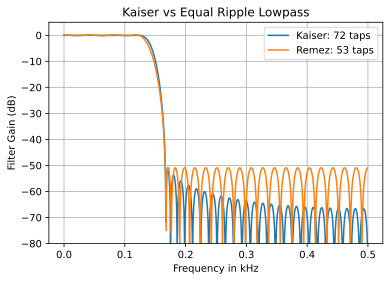

In [ ]:
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

Code diatas menampilkan respon frekuensi dari dua filter low-pass FIR yang telah dirancang sebelumnya, b_k dan b_r . Fungsi fir_d.freqz_resp_list digunakan untuk menghitung dan menampilkan respon frekuensi dari filter-filter tersebut dalam dB, dengan parameter fs=1 untuk normalisasi frekuensi sampling. Kemudian, ylim([-80,5]) mengatur batas y-axis dari -80 dB hingga 5 dB.

In [ ]:
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

Hampir sama dengan code sebelumnya, namun code diatas merancang dua filter high-pass FIR. Metode yang digunakan adalah metode kaiser window (b_k_hp) dan metode remez (b_r_hp)

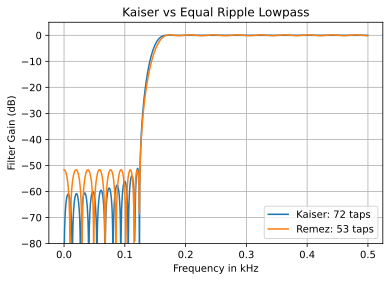

In [ ]:
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

Code diatas juga menghasilkan output berupa tampilan respon frekuensi dari dua filter high-pass FIR yang telah dirancang sebelumnya, b_k_hp dan b_r_hp. Fungsi fir_d.freqz_resp_list digunakan untuk  menampilkan perhitungan respon frekuensi dari kedua filter tersebut dalam dB, dengan parameter fs=1 untuk normalisasi frekuensi sampling. Lalu, ylim([-80,5]) mengatur batas y-axis dari -80 dB hingga 5 dB.

In [7]:
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

Setelah merancang low-pass dan high-pass filter, kode diatas merancang band-pass FIR dengan kedua metode yaitu metode kaiser window dan remez window.

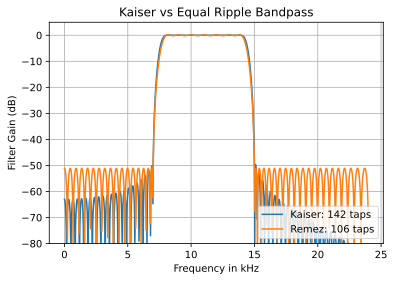

In [ ]:
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Bandpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k_bp),
        r'Remez: %d taps' % len(b_r_bp)),
       loc='lower right')
grid();

Code diatas juga  menampilkan respon frekuensi dari dua filter band-pass FIR yang dirancang sebelumnya dengan metode Kaiser dan  metode Remez. Fungsi fir_d.freqz_resp_list digunakan untuk menampilakn respons frekuensi dari kedua filter tersebut dalam dB, dengan parameter fs=48 untuk memperhitungkan frekuensi sampling sebesar 48 kHz. Mengatur batas y-axis dari -80 dB hingga 5 dB dengan ylim([-80,5])

In [8]:
b_up = fir_d.fir_remez_lpf(3300,4300,0.5,60,96000)

Code diatas merupakan rancangan filter low-pass  FIR yang menggunakan metode Remez dengan parameter cut-off frequency 3300 Hz, stopband frequency 4300 Hz, ripple tolerance 0.5 dB, jumlah tap filter 60, dan frekuensi sampling 96000 Hz

In [9]:
mr_up = mrh.multirate_FIR(b_up)

Menggunakan filter yang sudah dirancang sebelumnya, variabel mr_up akan memungkinkan penggunaan filter dalam aplikasi pemrosesan sinyal multirate, seperti resampling atau interpolasi.

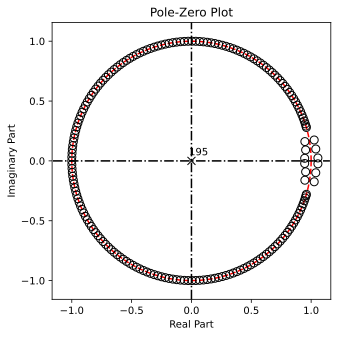

In [ ]:
# Take a look at the pole-zero configuration of this very
# high-order (many taps) linear phase FIR
mr_up.zplane()

Code diatas memvisualisasikan diagram pola pole-zero dari filter FIR yang telah didefinisikan sebelumnya.

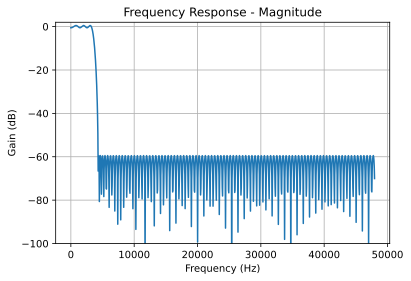

In [ ]:
# Verify the passband and stopband gains are as expected
mr_up.freq_resp('db',96000)

Pada code diatas, mr_up.freq_resp('db', 96000) digunakan untuk menghitung dan menampilkan respons frekuensi dari filter FIR dalam skala desibel pada frekuensi sampel 96000 Hz.

In [ ]:
(len(b_up-1))/2

98.0

Code diatas menghitung setengah panjang filter FIR pada code sebelumnya, hasil 98,0 mewakili jarak dari pusat filter ke tepi, yang merupakan parameter penting dalam menentukan waktu delay dan karakteristik filter.

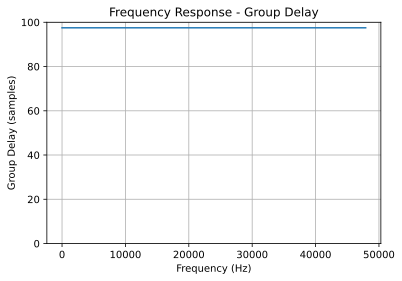

In [ ]:
# Verify that the FIR design has constant group delay (N_taps - 1)/2 samples
mr_up.freq_resp('groupdelay_s',96000,[0,100])

Code diatas menggunakan perintah mr_up.freq_resp('groupdelay_s',96000,[0,100])  untuk menghitung dan menampilkan waktu delay grup dari filter FIR dalam satuan detik pada rentang frekuensi 0 Hz hingga 100 Hz dengan frekuensi sampel 96000 Hz.

In [ ]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

Code diatas menunjukkan contoh  filter low-pass IIR dari berbagai metode. Untuk frekuensi sampling fs sebesar 48000 Hz, m:etode-metode yang digunakan adalah Filter Butterworth (b_but, a_but, sos_but), Chebyshev tipe 1 (b_cheb1, a_cheb1, sos_cheb1), Chebyshev tipe 2 (b_cheb2, a_cheb2, sos_cheb2), dan elliptic (b_elli, a_elli, sos_elli) dirancang dengan parameter cut-off frequency f_pass, stopband frequency f_stop, toleransi noise 0.5 dB, dan orde 60.

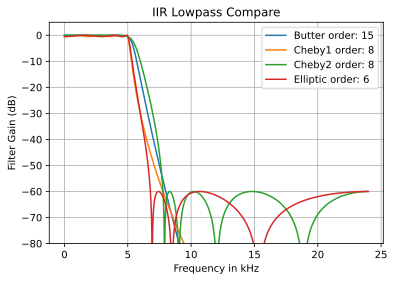

In [ ]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1),
        r'Cheby2 order: %d' % (len(a_cheb2)-1),
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

Code diatas menampilkan perbandingan respon frekuensi dari empat filter low-pass IIR yang didefinisikan pada code sebelumnya. Fungsi iir_d.freqz_resp_cas_list digunakan untuk menghitung dan menampilkan respons frekuensi dari masing-masing filter dalam dB, dengan parameter fs=48 untuk memperhitungkan frekuensi sampling sebesar 48 kHz. Batas y-axis ditetapkan dari -80 dB hingga 5 dB dengan ylim([-80,5]).

(15, 15)

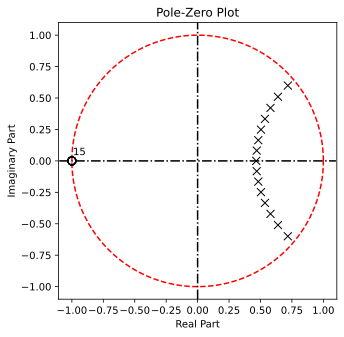

In [ ]:
iir_d.sos_zplane(sos_but)


Pada code diatas, Fungsi iir_d.sos_zplane(sos_but) digunakan untuk menampilakan diagram pole-zero untuk filter IIR yang direpresentasikan dalam bentuk sekumpulan orde-kedua (second-order sections).

In [ ]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)


Code diatas mendefinisikan sebuah filter low-pass IIR dengan menggunakan metode elliptic dengan parameter cut-off frequency 1950 Hz, stopband frequency 2050 Hz, toleransi noise 0.5 dB, orde 80, dan frekuensi sampling 8000 Hz.

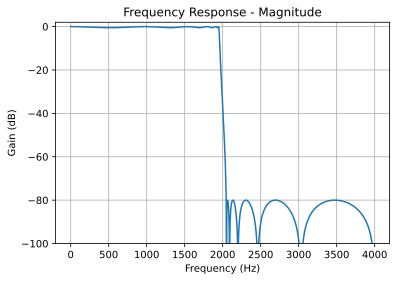

In [ ]:
mr_lp.freq_resp('db',8000)

Menghitung dan menampilkan respons frekuensi dari filter IIR low-pass yang telah didefinisikan sebelumnya dalam skala desibel pada frekuensi sampel 8000 Hz.

(-130.0, -30.0)

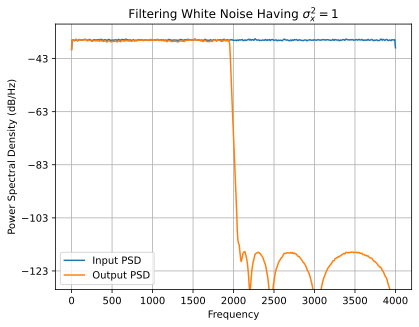

In [ ]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

Code diatas melakukan filtering dari sinyal white noise x menggunakan filter low-pass IIR yang telah dirancang sebelumnya (mr_lp). Kemudian, spektrum daya (PSD) dari sinyal input dan output ditampilkan menggunakan fungsi psd, dengan jendela Welch dengan panjang 2^10 dan frekuensi sampling 8000 Hz.

In [ ]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz


Menghitung dan mencetak nilai spektral daya yang diharapkan dari sinyal putih (white noise) pada frekuensi sampling 8000 Hz, diukur dalam dB/Hz.

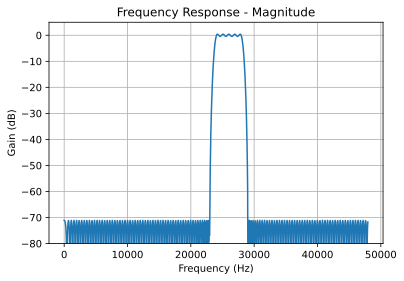

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
ylim([-80, 5])
grid();

code diatas mendefinisikan sebuah filter band-pass FIR menggunakan metode Remez dengan parameter batas frekuensi bawah 23000 Hz, batas frekuensi atas 24000 Hz, batas frekuensi transisi bawah 28000 Hz, batas frekuensi transisi atas 29000 Hz, toleransi ripple 0.5, orde 70, dan frekuensi sampling 96000 Hz. Plot respons frekuensi filter yang dihasilkan kemudian ditampilkan dalam skala dB menggunakan fir_d.freqz_resp_list, dengan batas y-axis dari -80 dB hingga 5 dB dan grid diaktifkan untuk memudahkan analisis.

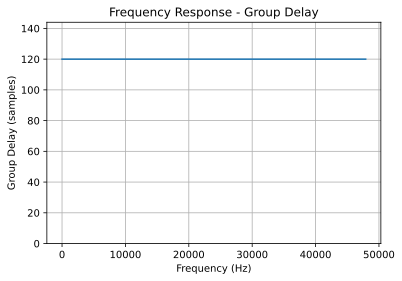

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
grid();

Menampilkan plot respons waktu delay grup dari filter FIR band-pass yang telah didefinisikan sebelumnya dengan menggunakan metode Remez.

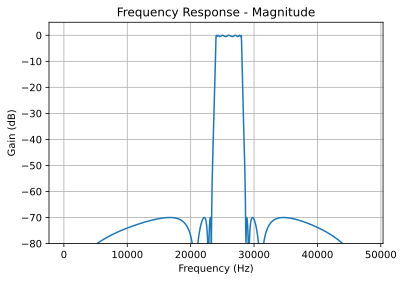

In [ ]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

code diatas mendefinisikan dan memplot filter band-pass IIR dengan menggunakan metode elliptic, dengan parameter batas frekuensi bawah 23000 Hz, batas frekuensi atas 24000 Hz, batas frekuensi transisi bawah 28000 Hz, batas frekuensi transisi atas 29000 Hz, toleransi ripple 0.5 dB, orde 70, dan frekuensi sampling 96000 Hz.

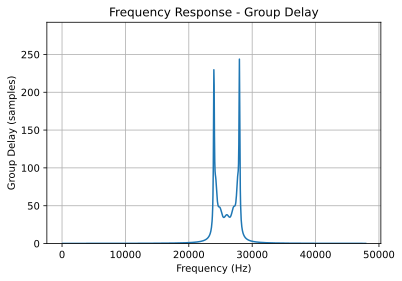

In [ ]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();

Code diatas menampilkan plot respons waktu delau grup dari filter band-pass II menggunakan metode elliptic yang sudah didefinisikan pada code sebelumnnya